In [55]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import peakutils
import util.FreqReader as fr
from util.DoubleAnharmonicity import DoubleAnharmonicity
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams['figure.dpi'] = 200

In [56]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
       return x * coef1
    elif 2000 < x:
      return x * coef2
    else: 
       return x

In [57]:
butanedioic_acid = fr.read_freq_jdx('succinic_acid/exp/butanedioic_acid.jdx')
pyridinecarboxylic_acid_amide = fr.read_freq_jdx('succinic_acid/exp/pyridinecarboxylic_acid_amide.jdx', reverse=True)
bacteriochlorophyll = fr.read_freq('succinic_acid/calc/b_far_1_freq_ir.txt')

In [61]:
def plot_all(dfs, legends, exp=None, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True, showPeaksFrom = 2000, showLegend=True):
    line = ['-', '--', '-.', ':', ':']
    colors = mcolors.TABLEAU_COLORS;

    maxY = 1
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        tempMaxY = y.max()
        if tempMaxY > maxY:
            maxY = tempMaxY
        plt.plot(x, y+i*y_shift, linestyle='-', lw=1, alpha=1)

        i = i+1
    
    if exp is not None:
      for df in exp:
        x = df['X']
        y = df['Y'] * maxY
        plt.plot(x, y+i*y_shift, linestyle='-', lw=1, alpha=1)

    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x[peak] > showPeaksFrom:
                    plt.text(x[peak], y[peak]+50+i*y_shift, int(x[peak]), horizontalalignment='center', color='black', rotation = 90)
            # plt.plot(x[peaks], y[peaks]+i*y_shift, 'black', marker="o", ls="", ms=2)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x[peaks], y[peaks]+i*y_shift, c=list(colors.values())[i%len(colors)], marker="o", ls="", ms=5)
        i = i+1
    


    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm⁻¹")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    maxY

In [78]:
def plot_all_ultra_short(dfs, legends, exp=None, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True, showPeaksRange=0, showXFrom = 3400, showXUpto=4000):
    tempDfs = []
    # for df in dfs:
    #     tempDfs.append(df.drop(df[df.X < showXFrom].index))
    colors = mcolors.TABLEAU_COLORS;

    maxY = 1
    for df in dfs:
        a = df[(df['X'] > showXFrom) & (df['X'] < showXUpto)]
        tempDfs.append(a)

    dfs = tempDfs
    i = 0
    line = ['-', '--', '-.', ':', ':']
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        tempMaxY = y.max()
        if tempMaxY > maxY:
            maxY = tempMaxY      
        plt.plot(x, y+i*y_shift, linestyle='-', lw=1, alpha=1)

        i = i+1

    if exp is not None:
      tempDfs = []
      for df in exp:
        a = df[(df['X'] > showXFrom) & (df['X'] < showXUpto)]
        tempDfs.append(a)
      exp = tempDfs
      for df in exp:
        x = df['X']
        y = df['Y'] * maxY
        plt.plot(x, y+i*y_shift, linestyle='-', lw=1, alpha=1)
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x.iloc[peak] > showPeaksRange:
                    plt.text(x.iloc[peak], y.iloc[peak]+50+i*y_shift, int(x.iloc[peak]), horizontalalignment='center', color='black', rotation = 90)
            # plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, 'black', marker="o", ls="", ms=2)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, c=list(colors.values())[i%len(colors)], marker="o", ls="", ms=3)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm⁻¹")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.legend().set_visible(False)


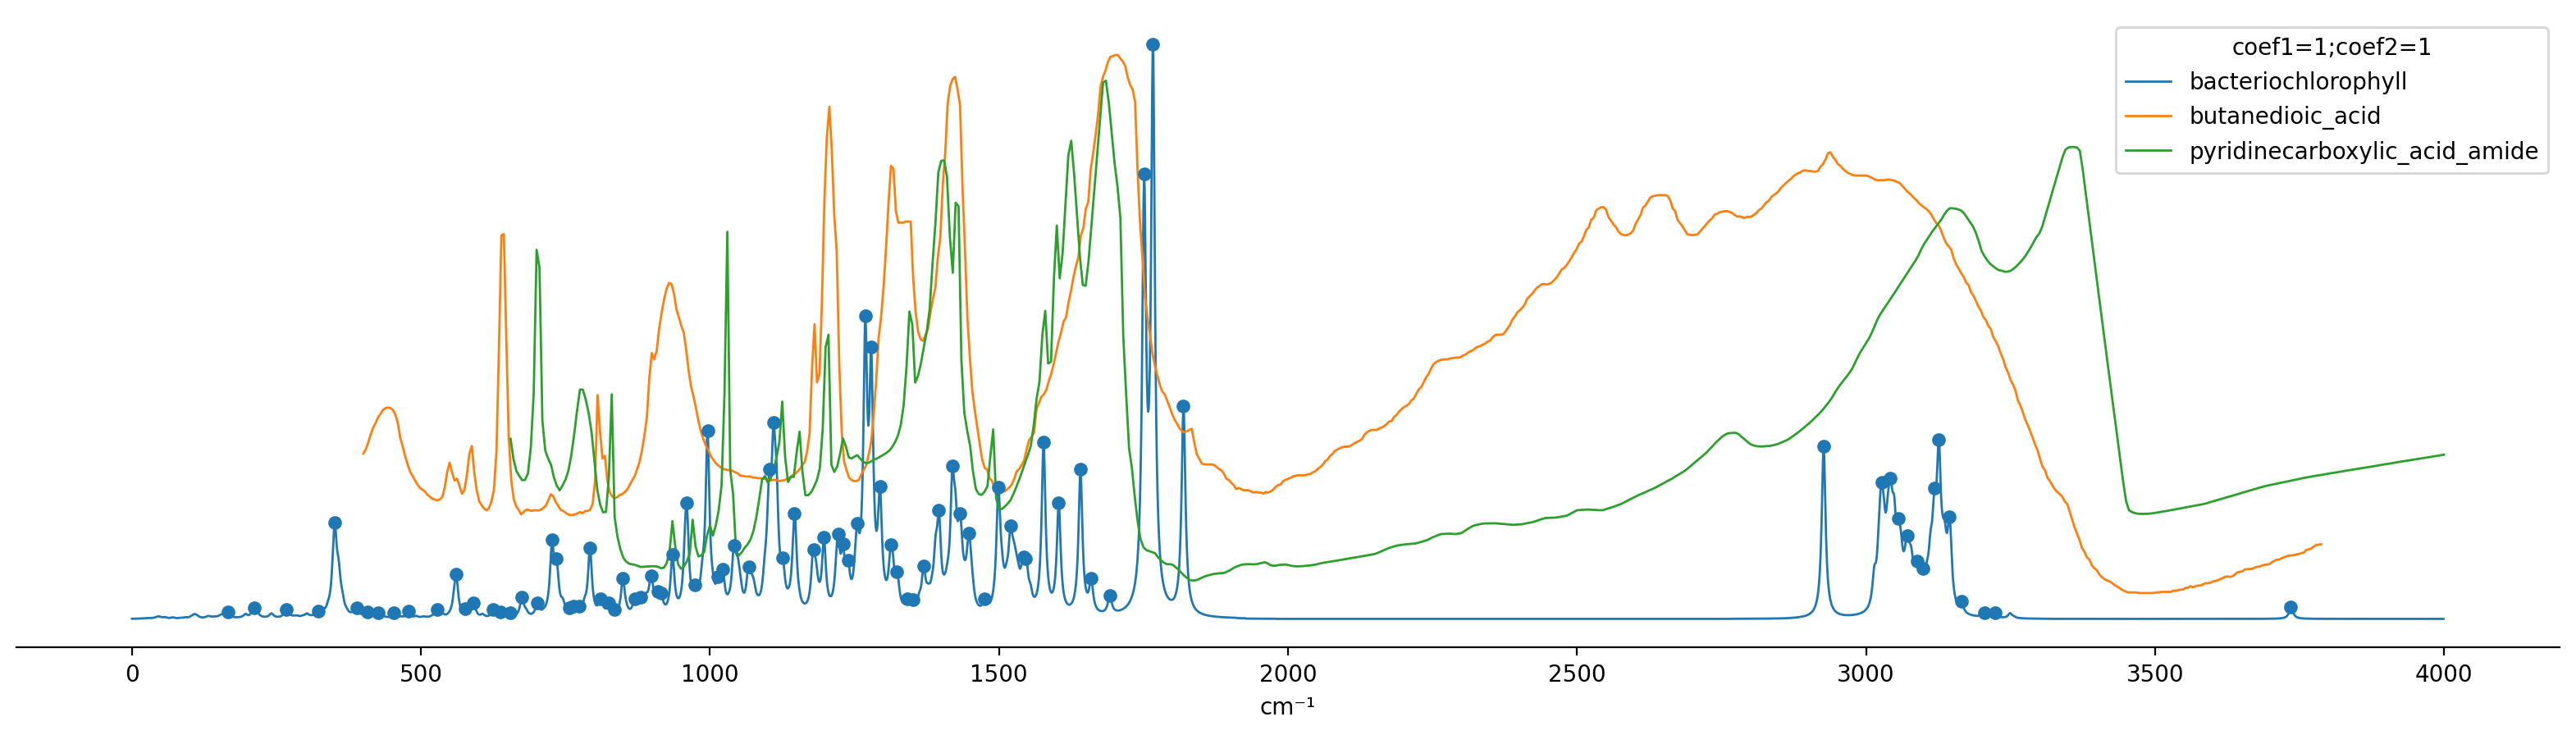

In [74]:
plot_all([bacteriochlorophyll], 
          ['bacteriochlorophyll','butanedioic_acid', 'pyridinecarboxylic_acid_amide'], exp=[butanedioic_acid, pyridinecarboxylic_acid_amide], 
          coef1=1, coef2=1, y_shift=0, showPeaksFrom=3100, forcedFirstPeaks=False, showLegend=True, showPeaks=False)

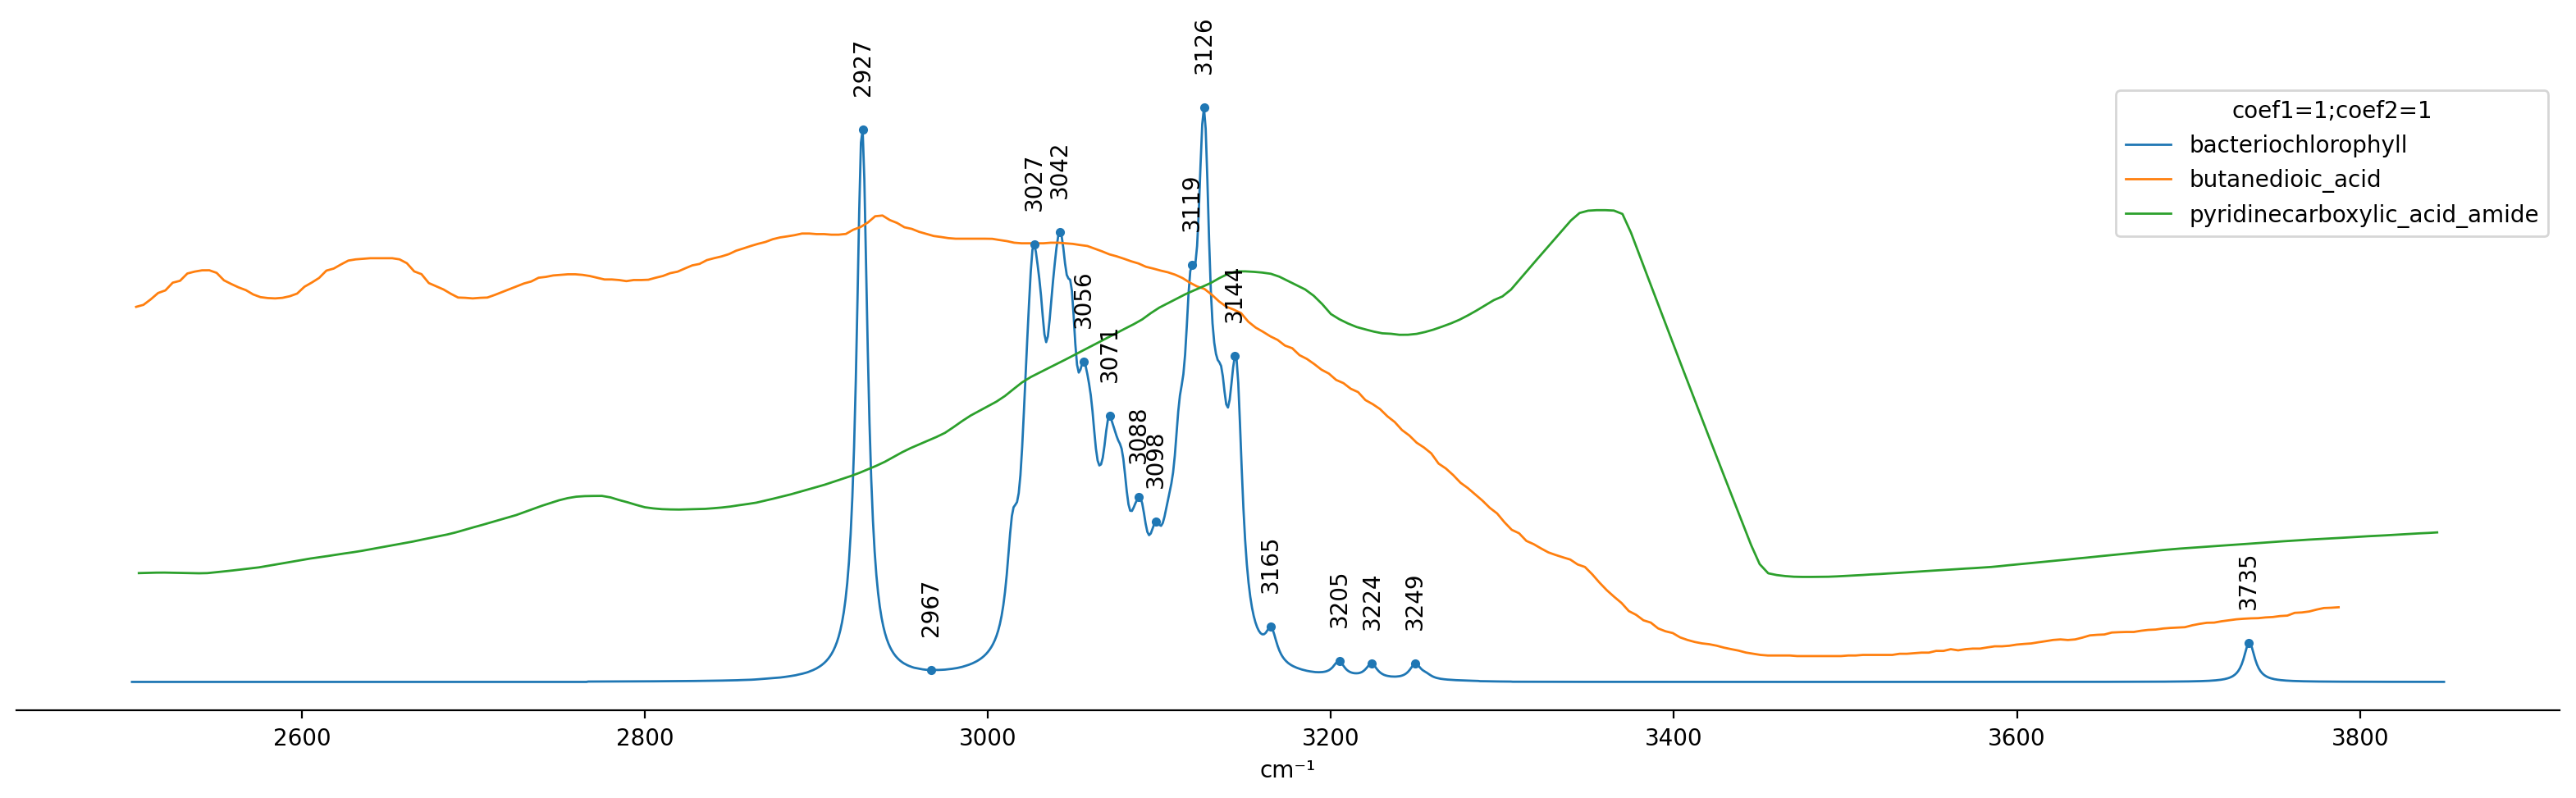

In [80]:
plot_all_ultra_short([bacteriochlorophyll], 
          ['bacteriochlorophyll','butanedioic_acid', 'pyridinecarboxylic_acid_amide'], exp=[butanedioic_acid, pyridinecarboxylic_acid_amide], 
           coef1=1, coef2=1, y_shift=0, showPeaks=True, showPeaksRange = 0, forcedFirstPeaks=True, showXFrom=2500, showXUpto=3850)